<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#K-means" data-toc-modified-id="K-means-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a href="http://jonchar.net/notebooks/k-means/" target="_blank">K-means</a></a></span></li></ul></div>

## [K-means](http://jonchar.net/notebooks/k-means/)

The algorithm goes like this:
* Initialize the  $k$  cluster centroids.
* Repeat:
    * Cluster assignment: Assign each data point to the nearest cluster centroid.
     $$c^{(i)} = argmin_{k} \left\lVert x^{(i)} - \mu_k\right\rVert^2$$
    * Cluster updating: For each cluster centroid, average the locations of it's corresponding points and re-assign the centroid to that location.
    $$\mu_k = \frac{1}{n}[x^{(k_1)}+x^{(k_2)}+...+x^{(k_n)}]$$

In [64]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

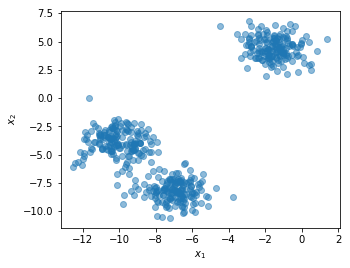

In [36]:
# Generate dataset
X, y = make_blobs(centers=3, n_samples=500, random_state=1)

# Visualize
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:,0], X[:,1], alpha=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
plt.show()

In [71]:
##### define the functions ---------------------
# 1) initialize centers
def initlize_cluster(points, k):
    """Initializes clusters as k randomly selected points from points."""
    nSmp = points.shape[0]
    return points[np.random.randint(nSmp, size=k)] # size can be tuple or ints. 

# 2) Function for calculating the distance between centroids
def get_dist(center, points):
    """Returns the distance the center is from each data point in points."""
    dist = np.linalg.norm(points - center, axis=1)  
    return dist

# 3) Now let's implement K-means using k = 3.
def kMeans(X, k, maxIter=100):
    nSmp, nFea = X.shape
    # 初始化 -----
    centers = initlize_cluster(X, k)
    classes = np.zeros(nSmp, dtype=np.uint16)
    dist = np.zeros((nSmp, k), dtype=np.float64)
    
    # Loop for the maximum number of iterations
    for it in xrange(maxIter): 
        
        # - Step 1: Assign all points to the nearest centroid
        for j, c in enumerate(centers): 
            dist[:,j] = get_dist(c, X)
            
        # Determine class membership of each point by picking the closest centroid
        classes = np.argmin(dist, axis=1)
        
        # - Step 2: update the centers 
        for j in xrange(k):
            centers[j] = np.mean(X[classes==j], axis=0)
    return centers, classes

k = 3
maxIter = 50
centers, classes = kMeans(X, k, maxIter)
# print classes

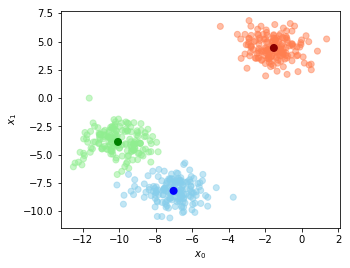

In [72]:
## plot the results -----
group_colors = ["skyblue", "coral", "lightgreen"]
colors = [group_colors[j] for j in classes]

fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:,0], X[:,1], color=colors, alpha=0.5)
ax.scatter(centers[:,0], centers[:,1], color=['blue', 'darkred', 'green'], marker='o', lw=2)
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
plt.show()

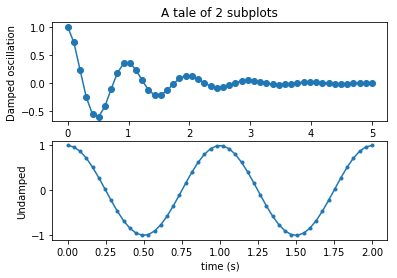

In [8]:
"""
=================
Multiple subplots
=================

Simple demo with multiple subplots.
"""
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()